In [1]:
import numpy as np
import pandas as pd

In [2]:
path = "./WA_Fn-UseC_-Telco-Customer-Churn.train.csv"
data = pd.read_csv(path)

In [3]:
data.head()

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,...,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8
1,No,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
2,Yes,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
3,Yes,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
4,No,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,


In [4]:
missing_val_count_by_column = (data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


In [5]:
data.columns

Index(['Churn', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [6]:
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoded = data[features].apply(encoder.fit_transform)
encoded.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,0,1,21,1,0,0,2,0,2,0,0,2,1,0,3,586
1,0,0,0,0,54,1,2,1,0,2,0,0,2,2,2,1,0,1170
2,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,59
3,1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,674
4,1,0,0,1,0,1,2,0,2,2,0,2,0,0,2,1,0,546
5,1,0,0,0,7,1,0,1,0,0,0,0,0,0,0,1,2,661
6,1,0,1,1,32,1,0,2,1,1,1,1,1,1,2,0,3,7
7,1,0,1,1,72,1,0,2,1,1,1,1,1,1,2,1,1,24
8,1,0,0,0,19,0,1,0,0,0,2,0,2,0,0,1,2,217
9,1,0,0,1,10,1,0,2,1,1,1,1,1,1,1,1,0,27


In [8]:
from sklearn.model_selection import train_test_split

y = data.Churn

X = encoded[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [20]:
# commentato perchè se no ogni volta che avvio tutto ci mette 2 anni

# score = 0
# for i in range (1, 11, 1) :
#     for j in range (1, 31, 1) :
#         clf = RandomForestClassifier(max_depth = i, random_state= j)
#         clf.fit(train_X, train_y)

#         accuracy = clf.score(val_X, val_y)
#         if accuracy > score :
#             score = accuracy
#             depth = i
#             random = j
# print(score, depth, random)

# ===>> 0.808374733853797 7 21

0.808374733853797 7 21


In [25]:
from sklearn.ensemble import RandomForestClassifier

depth = 7
random = 21

clf = RandomForestClassifier(max_depth= depth, random_state= random)
clf.fit(train_X, train_y)

RandomForestClassifier(max_depth=7, random_state=21)

In [22]:
print("Accuracy on training set: {:.3f}".format(clf.score(train_X, train_y)))
print("Accuracy on test set: {:.3f}".format(clf.score(val_X, val_y)))

Accuracy on training set: 0.827
Accuracy on test set: 0.808


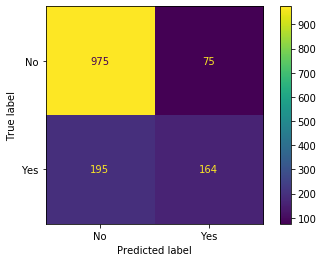

In [24]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

plot_confusion_matrix(clf, val_X, val_y)  # doctest: +SKIP
plt.show()